In [1]:
# https://medium.com/datadriveninvestor/building-neural-network-using-keras-for-regression-ceee5a9eadff

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import tensorflow
%matplotlib inline
dataset = pd.read_csv('Resources/TestData.csv')
dataset.head(2)

C:\Users\tomsh\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


,ID,Lot Frontage,Lot Area,Overall Qual,Year Built,Year Remod/Add,Mas Vnr Area,BsmtFin SF 1,Bsmt Unf SF,Total Bsmt SF,...,Gr Liv Area,Full Bath,Half Bath,TotRms AbvGrd,Fireplaces,Garage Cars,Garage Area,Wood Deck SF,Open Porch SF,SalePrice
0,0,141,31770,6,1960,1960,112,639,441,1080,...,1656,1,0,7,2,2,528,210,62,215000
1,1,80,11622,5,1961,1961,0,468,270,882,...,896,1,0,5,0,1,730,140,0,105000


In [3]:
dataset.describe(include='all')

,ID,Lot Frontage,Lot Area,Overall Qual,Year Built,Year Remod/Add,Mas Vnr Area,BsmtFin SF 1,Bsmt Unf SF,Total Bsmt SF,...,Gr Liv Area,Full Bath,Half Bath,TotRms AbvGrd,Fireplaces,Garage Cars,Garage Area,Wood Deck SF,Open Porch SF,SalePrice
count,2930.00000,2930.000000,2930.000000,2930.000000,2930.000000,2930.000000,2930.000000,2930.000000,2930.000000,2930.000000,...,2930.000000,2930.000000,2930.000000,2930.000000,2930.000000,2930.000000,2930.000000,2930.000000,2930.000000,2930.000000
mean,1464.50000,57.647782,10147.921843,6.094881,1971.356314,1984.266553,101.096928,442.478498,559.071672,1051.255631,...,1499.690444,1.566553,0.379522,6.443003,0.599317,1.766212,472.658362,93.751877,47.533447,180796.060068
std,845.96247,33.499441,7880.017759,1.411026,30.245361,20.860286,178.634545,455.586452,439.540571,440.968018,...,505.508887,0.552941,0.502629,1.572964,0.647921,0.761137,215.187196,126.361562,67.483400,79886.692357
min,0.00000,0.000000,1300.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,...,334.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,12789.000000
25%,732.25000,43.000000,7440.250000,5.000000,1954.000000,1965.000000,0.000000,0.000000,219.000000,793.000000,...,1126.000000,1.000000,0.000000,5.000000,0.000000,1.000000,320.000000,0.000000,0.000000,129500.000000
50%,1464.50000,63.000000,9436.500000,6.000000,1973.000000,1993.000000,0.000000,370.000000,465.500000,990.000000,...,1442.000000,2.000000,0.000000,6.000000,1.000000,2.000000,480.000000,0.000000,27.000000,160000.000000
75%,2196.75000,78.000000,11555.250000,7.000000,2001.000000,2004.000000,162.750000,734.000000,801.750000,1301.500000,...,1742.750000,2.000000,1.000000,7.000000,1.000000,2.000000,576.000000,168.000000,70.000000,213500.000000
max,2929.00000,313.000000,215245.000000,10.000000,2010.000000,2010.000000,1600.000000,5644.000000,2336.000000,6110.000000,...,5642.000000,4.000000,2.000000,15.000000,4.000000,5.000000,1488.000000,1424.000000,742.000000,755000.000000


In [4]:
dataset.dtypes


ID                int64
Lot Frontage      int64
Lot Area          int64
Overall Qual      int64
Year Built        int64
Year Remod/Add    int64
Mas Vnr Area      int64
BsmtFin SF 1      int64
Bsmt Unf SF       int64
Total Bsmt SF     int64
1st Flr SF        int64
2nd Flr SF        int64
Gr Liv Area       int64
Full Bath         int64
Half Bath         int64
TotRms AbvGrd     int64
Fireplaces        int64
Garage Cars       int64
Garage Area       int64
Wood Deck SF      int64
Open Porch SF     int64
SalePrice         int64
dtype: object

In [5]:
dataset2 = dataset[["Lot Frontage","Lot Area","Overall Qual","Year Built","Year Remod/Add","Mas Vnr Area","BsmtFin SF 1","Bsmt Unf SF","Total Bsmt SF","1st Flr SF","2nd Flr SF","Gr Liv Area","Full Bath","Half Bath","TotRms AbvGrd","Fireplaces","Garage Cars","Garage Area","Wood Deck SF","Open Porch SF","SalePrice"]]

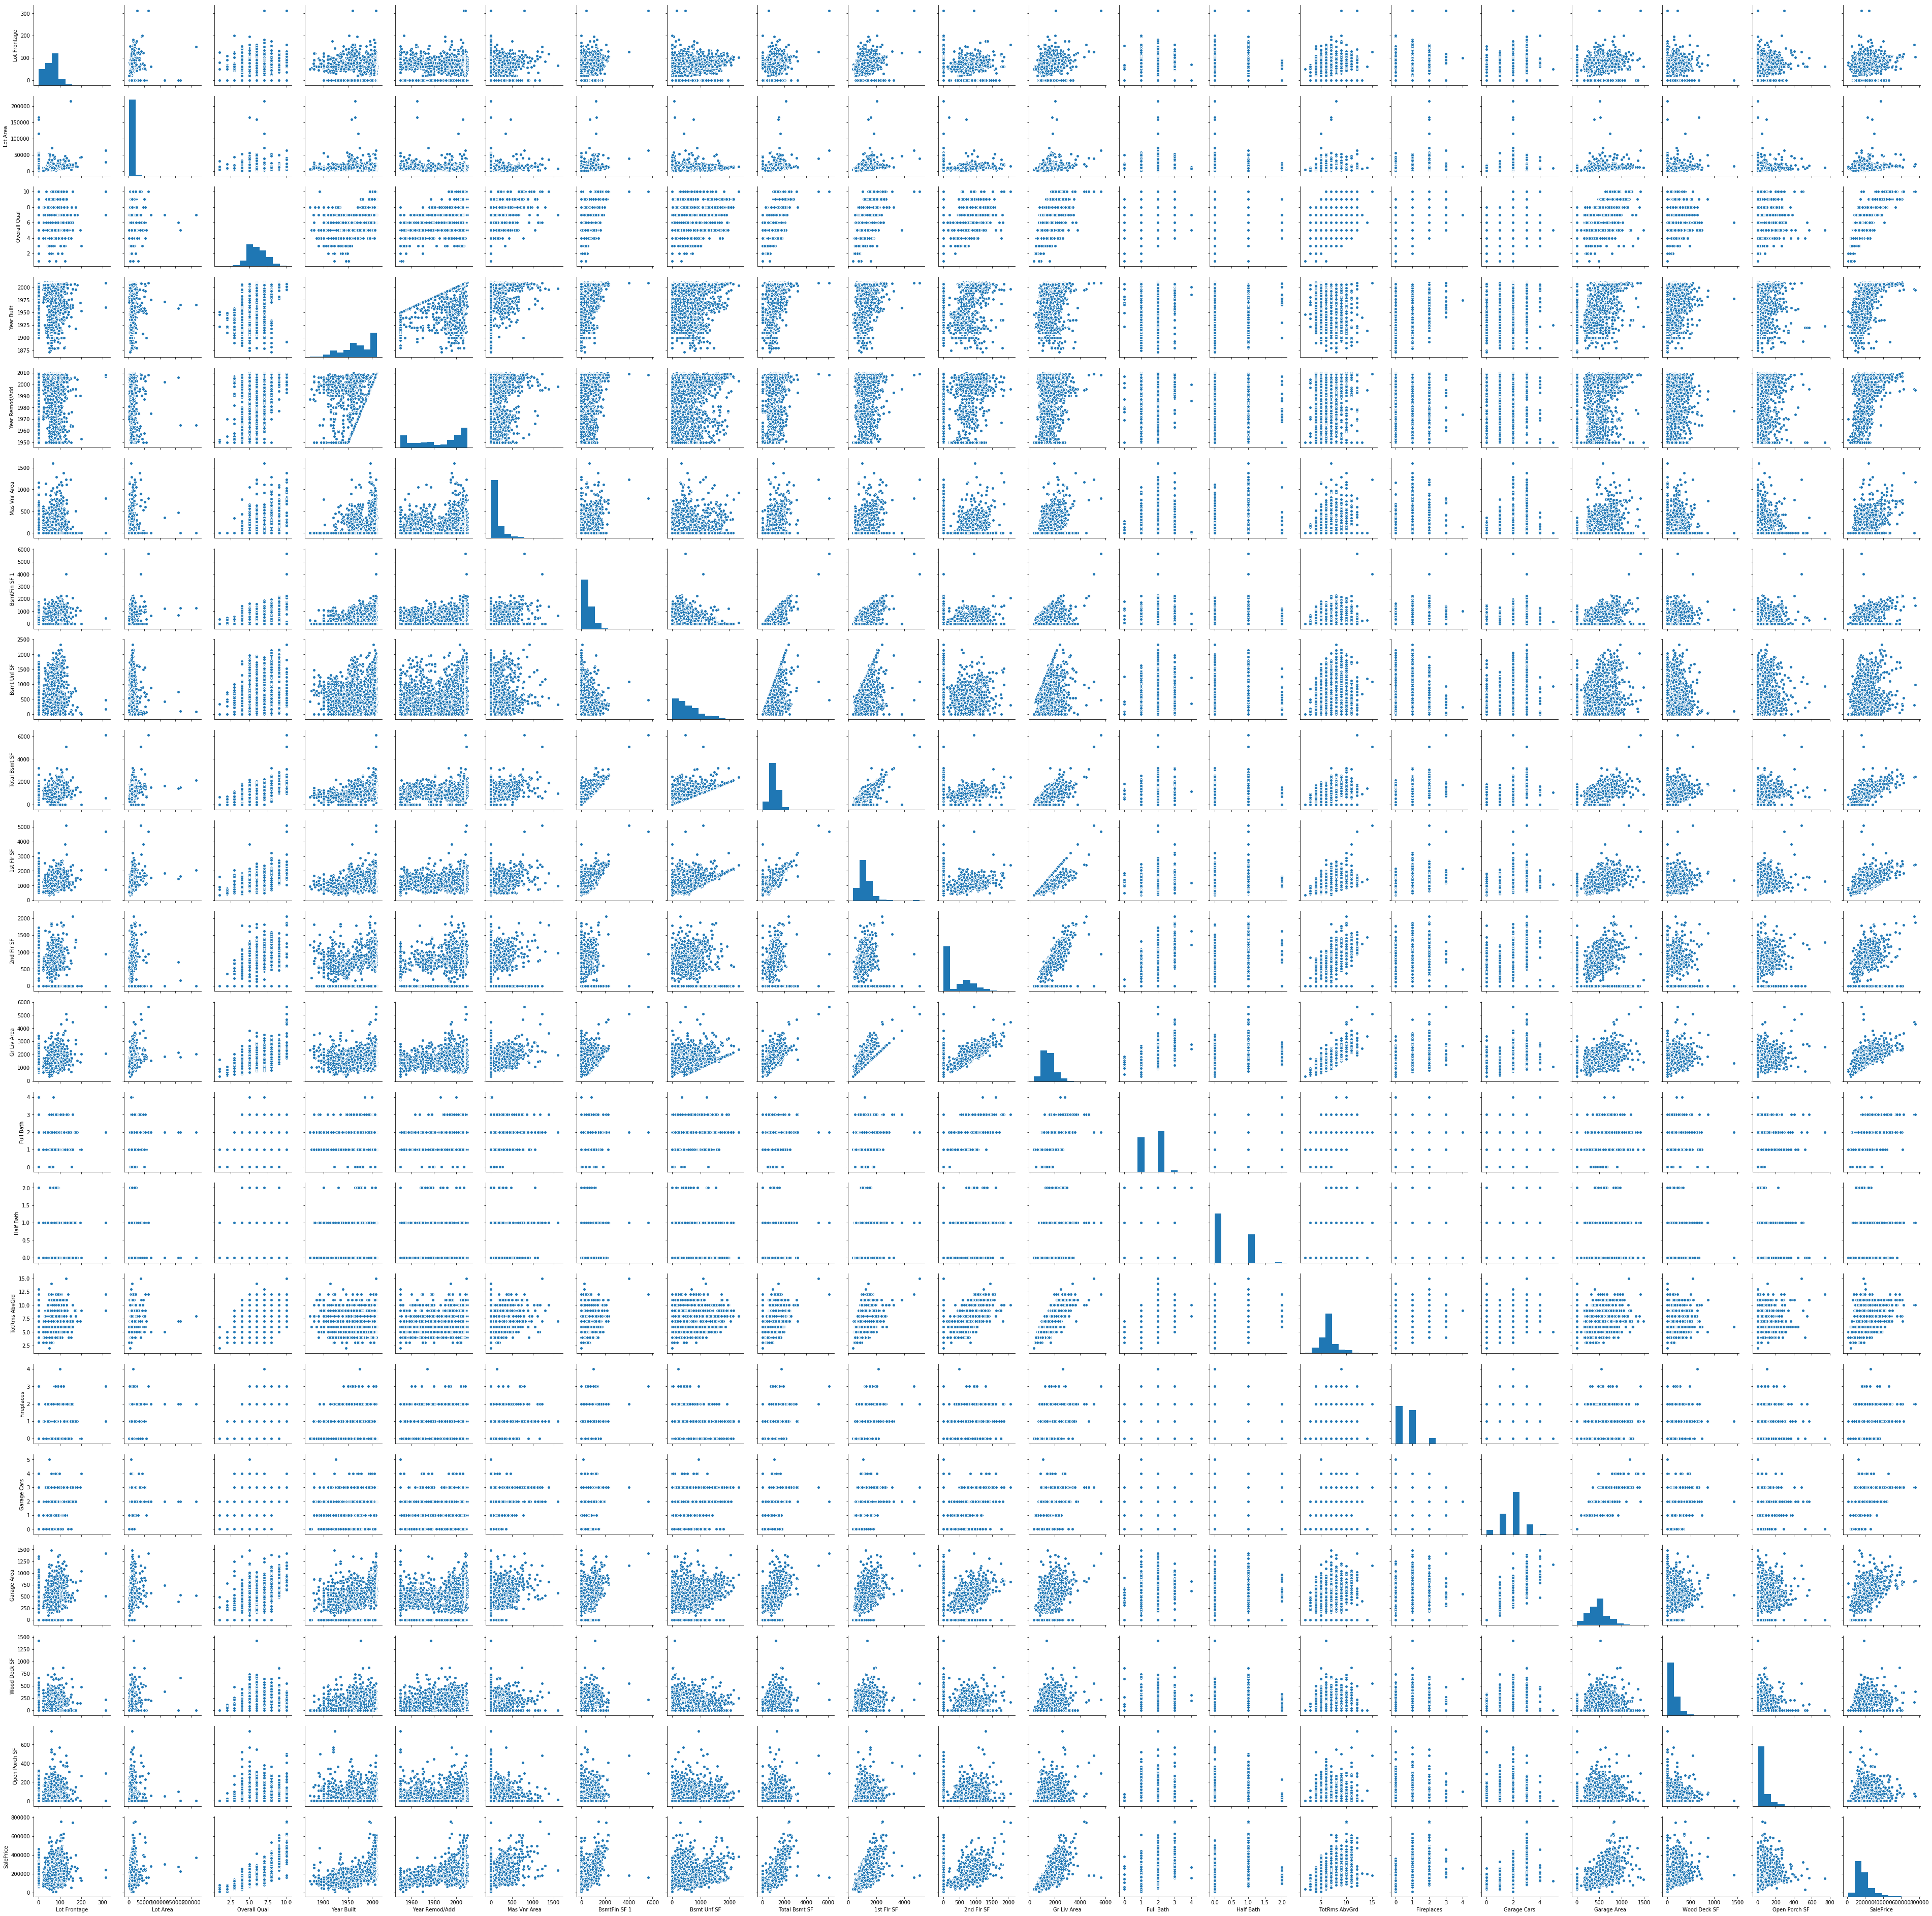

In [6]:
pair_img = sns.pairplot(dataset2)
pair_img.savefig("Images/PairPlots.png")

In [7]:
X=dataset.iloc[:,1:21]
y=dataset.iloc[:,21].values

In [8]:
from sklearn.preprocessing import  MinMaxScaler
sc= MinMaxScaler()
X= sc.fit_transform(X)
y= y.reshape(-1,1)
y=sc.fit_transform(y)

C:\Users\tomsh\Anaconda3\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by MinMaxScaler.
  warnings.warn(msg, DataConversionWarning)


In [9]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)


In [10]:
# Numpy array version of .head()
X_train[:10]

array([[0.13099042, 0.02725934, 0.77777778, 0.97101449, 0.93333333,
        0.11125   , 0.0042523 , 0.57619863, 0.22422259, 0.21760134,
        0.        , 0.19517709, 0.5       , 0.        , 0.30769231,
        0.25      , 0.4       , 0.32526882, 0.08426966, 0.06603774],
       [0.12779553, 0.01635934, 0.33333333, 0.31884058, 0.66666667,
        0.        , 0.03490432, 0.42765411, 0.19574468, 0.1810544 ,
        0.        , 0.16239638, 0.25      , 0.        , 0.23076923,
        0.        , 0.4       , 0.29569892, 0.        , 0.        ],
       [0.07667732, 0.00471149, 0.55555556, 0.74637681, 0.41666667,
        0.        , 0.05067328, 0.1177226 , 0.13993453, 0.10943079,
        0.29104116, 0.21137905, 0.5       , 0.5       , 0.38461538,
        0.        , 0.4       , 0.30913978, 0.        , 0.        ],
       [0.20447284, 0.05048961, 0.44444444, 0.75362319, 0.43333333,
        0.13875   , 0.08079376, 0.        , 0.07463175, 0.1468179 ,
        0.        , 0.13168802, 0.25      , 0

In [11]:
from sklearn.preprocessing import  MinMaxScaler
sc= MinMaxScaler()
X= sc.fit_transform(X)
y= y.reshape(-1,1)
y=sc.fit_transform(y)

In [12]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)


In [13]:
from tensorflow.python.keras.models import Sequential
# from keras import Sequential
from tensorflow.python.keras.layers import Dense
# from keras.layers import Dense
def build_regressor():
    regressor = Sequential()
    regressor.add(Dense(units=20, input_dim=20))
    regressor.add(Dense(units=1))
    regressor.compile(optimizer='adam', loss='mean_squared_error',  metrics=['mae','accuracy'])
    return regressor

In [14]:
from tensorflow.python.keras.wrappers.scikit_learn import KerasRegressor
# from keras.wrappers.scikit_learn import KerasRegressor
regressor = KerasRegressor(build_fn=build_regressor, batch_size=100,epochs=100)

In [15]:
results=regressor.fit(X_train,y_train)

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Use tf.cast instead.
Instructions for updating:
Use tf.cast instead.
Epoch 1/100
2051/2051 [==============================] - 0s 55us/sample - loss: 0.1032 - mean_absolute_error: 0.2418 - acc: 4.8757e-04
Epoch 2/100
2051/2051 [==============================] - 0s 11us/sample - loss: 0.0391 - mean_absolute_error: 0.1647 - acc: 4.8757e-04
Epoch 3/100
2051/2051 [==============================] - 0s 11us/sample - loss: 0.0285 - mean_absolute_error: 0.1314 - acc: 4.8757e-04
Epoch 4/100
2051/2051 [==============================] - 0s 12us/sample - loss: 0.0239 - mean_absolute_error: 0.1226 - acc: 4.8757e-04
Epoch 5/100
2051/2051 [==============================] - 0s 11us/sample - loss: 0.0202 - mean_absolute_error: 0.1115 - acc: 4.8757e-04
Epoch 6/100
2051/2051 [==============================] - 0s 11us/sample - loss: 0.0170 - mean_absolute_error: 0.1029 - acc: 4.8757e-04
Epoch 7/100
2051/2051 

In [16]:
y_pred= regressor.predict(X_test)

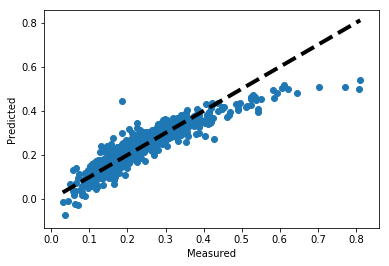

In [17]:
fig, ax = plt.subplots()
ax.scatter(y_test, y_pred)
ax.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=4)
ax.set_xlabel('Measured')
ax.set_ylabel('Predicted')

plt.savefig('Images/NeuralNetModel.png')
plt.show()

In [18]:
# Calculate R^2 using the scikit learn function. This measures the quality of the regression model.
from sklearn.metrics import r2_score
R2 = r2_score(y_test, y_pred)
R2

0.8380012711563765